In [1]:
import matplotlib.pyplot as plt
plt.rcParams['axes.linewidth'] =3
plt.rc('font', family='serif')
size=13
plt.rc('xtick', labelsize=size)
plt.rc('ytick', labelsize=size)
plt.rc('axes', labelsize=size)

# House price prediction
###                             Rabindev Bishal

# Outlines

#### 1. Problem definition
#### 2. Importing data and its visualization
#### 3. Find the effective independent variables and target variables 
#### 4. Model selection
#### 5. Training and testing the data
#### 6. Fitting the model and prediction
#### 7. Accuracy determination
#### 8. Conclusion

### Problem definition:
#### We have the data house price in some part of the Boston city. Data set contains many attributes like average crime rate, number of rooms, pollution parameter, population density,income tax rate, etc.
##### We have to find proper predictors among these given attributes and based on these predictor we have to estimate the price of a house. We have used linear regression method to find a model to predict the house price of the Boston city.

## Importing libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

### Loading the  dataset 

In [21]:
house=datasets.load_boston()
df=pd.DataFrame(house.data,columns=house.feature_names)
df['y']=house.target

print(house.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Data shape and attributes

In [4]:
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Description of the data

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Checking  any missing values in the data set

In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
y          0
dtype: int64

### Target variable 

In [14]:
target = pd.DataFrame(house.target, columns=["MEDV"])
X=df[["RM","LSTAT"]]
y=df["y"]

### Data visualization 

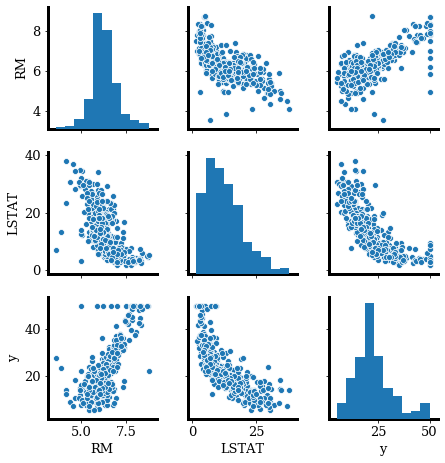

In [8]:
import seaborn as sns
sns.pairplot(df[['RM',"LSTAT","y"]],size=2.2)

### Checking correlation among the input features

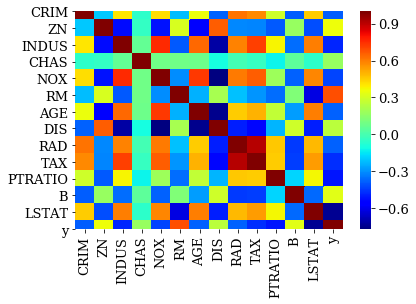

In [9]:
import seaborn as sns
sns.heatmap(df.corr(),cmap='jet')

### Data visualization

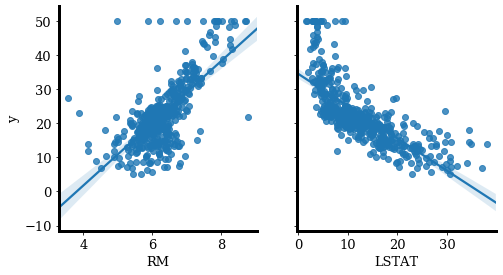

In [10]:
sns.pairplot(df, x_vars=['RM','LSTAT'], y_vars='y', size=4, aspect=0.9, kind='reg',palette='hsv')

### Regression using Ordinary least square method

In [11]:
import statsmodels.formula.api as smf
ls = smf.ols(formula='y ~ RM+LSTAT ', data=df).fit()

# print the coefficients
ls.params

Intercept   -1.358273
RM           5.094788
LSTAT       -0.642358
dtype: float64

### Model Stattistics

In [12]:
ls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Wed, 30 Oct 2019   Prob (F-statistic):          7.01e-112
Time:                        10:40:02   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.669      -7.592       4.875
RM             5.0948      0.444     11.463      0.000       4.222       5.968
LSTAT         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Adj. R- squared value: 
#### It's most useful as a tool for comparing different models.

#### Is has value 63.7%. It suggests that 63.7% house price can be estimated by these predictor variables.

### Regression coefficient (coef): 
#### It represents the change in the target variable due to change of one predictor variable by one unit when other predictor variables are constant. 
#### We have selected two predictor variables based on their coef value. They are "RM", "LSTAT".

#### The coefs values for these variables are 5.09,- 0.64.


### Standard error:

#### It measures the accuracy of coefficient by estimating the variation of the coefficient if the same test were run on a different sample of our population. The standard errors are 0.444 and 0.044.

### Hypothesis testing and p-value

#### (1) We assumes the null hypothesis that there is no linear relationship between predictor and target variables. So, linear coefficients would be zero.
#### (2) Instead of that we have got the non zero value of the coefficients whch rejects the null hypothesis. 

#### (3) The p-value corresponds to the probability that the coefficient is actually zero. Here, p-value is very small (<0.05) and it is zero for both predictor. We can reject the null hypothesis. We can say that there is linear dependence of the house price on the predictor variables "RM" and "LSTAT".


### Confidence interval:

#### Confidence interval is a range within which our coefficient is likely to fall. Here, coefficients are showing the probable range of the estimated coefficients.
#### The cofidence interval for "RM" is 4.222 - 5.968 and for  "LSTAT" the interval is 
#### -0.728 - 0.556.

### Training and testing the data

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.3, random_state=0)
rig= LinearRegression()
reg_model=rig.fit(X_train,y_train)


### Model coefficients

In [16]:
rig.coef_

array([ 5.27350522, -0.6418309 ])

### Prediction and  regression score

In [17]:
y_pred=reg_model.predict(X_test);
rig.score(X_test,y_test)

0.6069792285352372

### MSE, MAE, RMSE computation

In [19]:
from sklearn import metrics
print("Mean square error =",(metrics.mean_squared_error(y_test, y_pred)))
print("Mean absolute error =",metrics.mean_absolute_error(y_test,y_pred))
print("Root mean square error =",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean square error = 32.72507169281495
Mean absolute error = 3.9950377587004233
Root mean square error = 5.720583160204469


### Conclusion

#### (1)  Price of the house in boston depends on the room size ("RM") and population density stat ("LSTAT").
#### (2)  Linear coefficient of room size is much larger compare to population statistics.
#### (3)  p-value of both the individual predictiors reject the null hypothesis of no linear relationship between predictors and the target value.